Dataset Information:
Feature names: ['petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 2)
Target distribution: [50 50 50]
--------------------------------------------------
Model Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



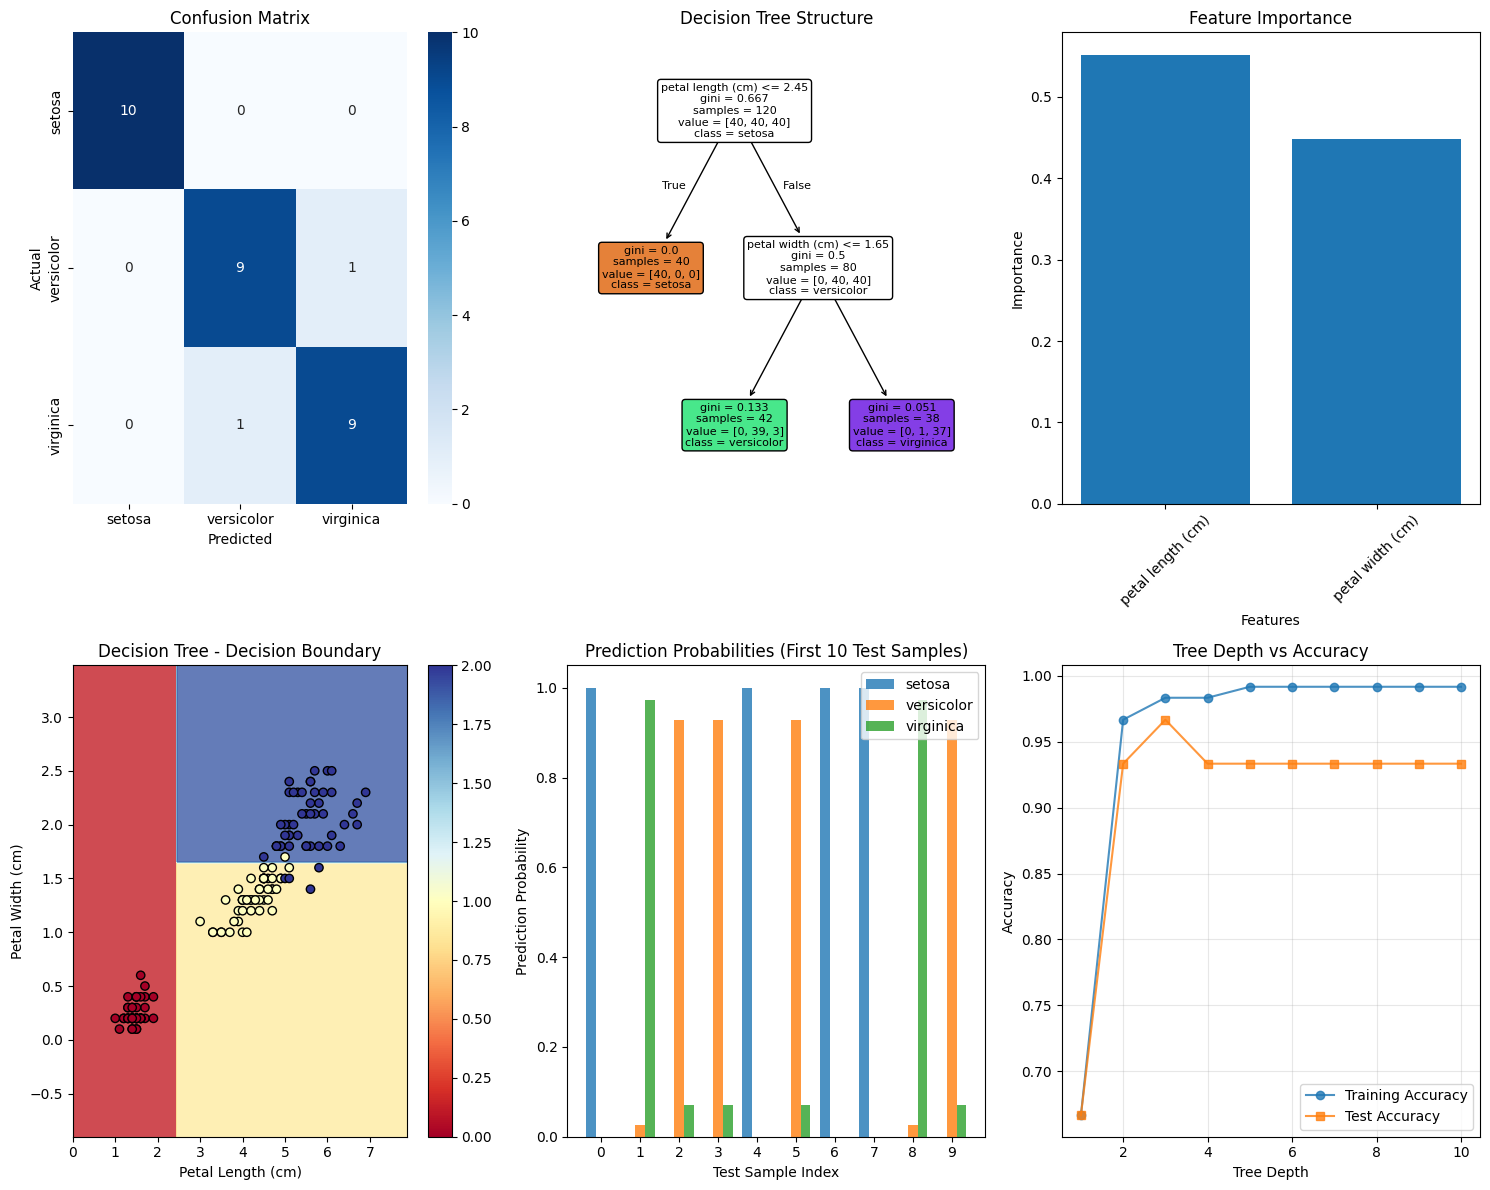


EXAMPLE PREDICTIONS

Sample 1: Petal Length=5.0, Petal Width=1.5
Predicted class: versicolor
Prediction probabilities:
  setosa: 0.0000
  versicolor: 0.9286
  virginica: 0.0714

Sample 2: Petal Length=3.0, Petal Width=1.0
Predicted class: versicolor
Prediction probabilities:
  setosa: 0.0000
  versicolor: 0.9286
  virginica: 0.0714

Sample 3: Petal Length=6.0, Petal Width=2.0
Predicted class: virginica
Prediction probabilities:
  setosa: 0.0000
  versicolor: 0.0263
  virginica: 0.9737

DECISION TREE REGRESSOR EXAMPLE
Regression R² Score: 0.9494
Mean Squared Error: 0.0321


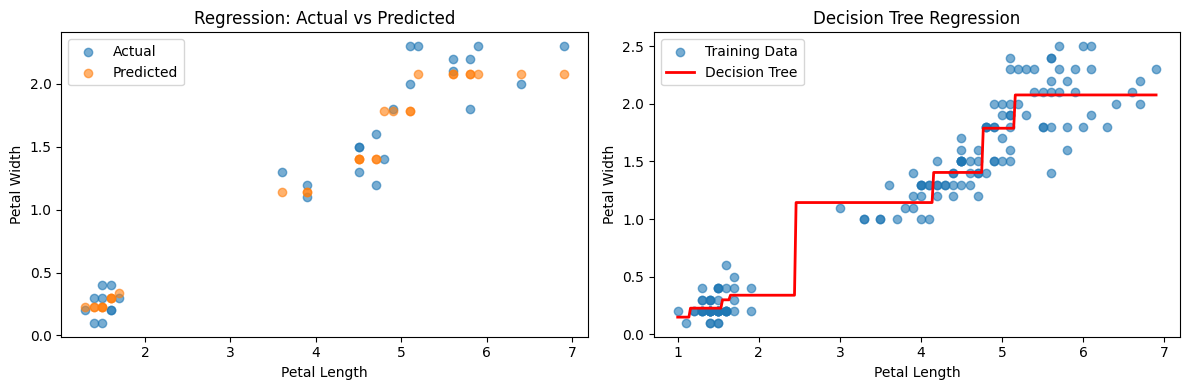


MODEL SUMMARY
Classification Accuracy: 0.9333
Regression R² Score: 0.9494
Tree Depth: 2
Number of leaves: 3
Feature Importance: {'petal length (cm)': np.float64(0.5518672199170125), 'petal width (cm)': np.float64(0.4481327800829875)}


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

print("Dataset Information:")
print(f"Feature names: {iris.feature_names[2:]}")
print(f"Target names: {iris.target_names}")
print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")
print("-" * 50)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(
    max_depth=2,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2
)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)
y_pred_proba = tree_clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))

# Plot 1: Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 2: Decision Tree Visualization
plt.subplot(2, 3, 2)
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Decision Tree Structure')

# Plot 3: Feature Importance
plt.subplot(2, 3, 3)
feature_importance = tree_clf.feature_importances_
features = iris.feature_names[2:]
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Plot 4: Decision Boundary Visualization
plt.subplot(2, 3, 4)
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    return scatter

scatter = plot_decision_boundary(X, y, tree_clf, 'Decision Tree - Decision Boundary')
plt.colorbar(scatter)

# Plot 5: Prediction Probabilities for Test Set
plt.subplot(2, 3, 5)
prob_df = pd.DataFrame(y_pred_proba, columns=iris.target_names)
prob_df['True_Class'] = [iris.target_names[i] for i in y_test]
prob_df['Predicted_Class'] = [iris.target_names[i] for i in y_pred]

# Show probabilities for first 10 test samples
sample_probs = prob_df.head(10)
x_pos = np.arange(len(sample_probs))
width = 0.25

for i, class_name in enumerate(iris.target_names):
    plt.bar(x_pos + i * width, sample_probs[class_name], width,
            label=class_name, alpha=0.8)

plt.xlabel('Test Sample Index')
plt.ylabel('Prediction Probability')
plt.title('Prediction Probabilities (First 10 Test Samples)')
plt.legend()
plt.xticks(x_pos + width, range(len(sample_probs)))

# Plot 6: Tree Depth vs Accuracy
plt.subplot(2, 3, 6)
depths = range(1, 11)
train_accuracies = []
test_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.plot(depths, train_accuracies, 'o-', label='Training Accuracy', alpha=0.8)
plt.plot(depths, test_accuracies, 's-', label='Test Accuracy', alpha=0.8)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)

# Test specific examples
test_samples = [[5.0, 1.5], [3.0, 1.0], [6.0, 2.0]]
for i, sample in enumerate(test_samples):
    pred = tree_clf.predict([sample])[0]
    proba = tree_clf.predict_proba([sample])[0]

    print(f"\nSample {i+1}: Petal Length={sample[0]}, Petal Width={sample[1]}")
    print(f"Predicted class: {iris.target_names[pred]}")
    print("Prediction probabilities:")
    for j, class_name in enumerate(iris.target_names):
        print(f"  {class_name}: {proba[j]:.4f}")

# Decision Tree Regressor Example
print("\n" + "="*50)
print("DECISION TREE REGRESSOR EXAMPLE")
print("="*50)

# For regression, we'll predict petal width based on petal length
X_reg = iris.data[:, 2:3]  # petal length only
y_reg = iris.data[:, 3]    # petal width

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_reg_train, y_reg_train)

y_reg_pred = tree_reg.predict(X_reg_test)

# Calculate R² score
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)

print(f"Regression R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot regression results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_reg_test, y_reg_test, alpha=0.6, label='Actual')
plt.scatter(X_reg_test, y_reg_pred, alpha=0.6, label='Predicted')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Regression: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
# Show regression tree decision boundary
X_reg_range = np.linspace(X_reg.min(), X_reg.max(), 300).reshape(-1, 1)
y_reg_range_pred = tree_reg.predict(X_reg_range)

plt.scatter(X_reg, y_reg, alpha=0.6, label='Training Data')
plt.plot(X_reg_range, y_reg_range_pred, color='red', linewidth=2, label='Decision Tree')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Tree Regression')
plt.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"Classification Accuracy: {accuracy:.4f}")
print(f"Regression R² Score: {r2:.4f}")
print(f"Tree Depth: {tree_clf.max_depth}")
print(f"Number of leaves: {tree_clf.get_n_leaves()}")
print(f"Feature Importance: {dict(zip(iris.feature_names[2:], tree_clf.feature_importances_))}")